In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer
from nltk.stem.wordnet import WordNetLemmatizer
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [68]:
data = pd.read_csv("bbc.csv")
print(data.shape)
data.head()

(2225, 2)


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


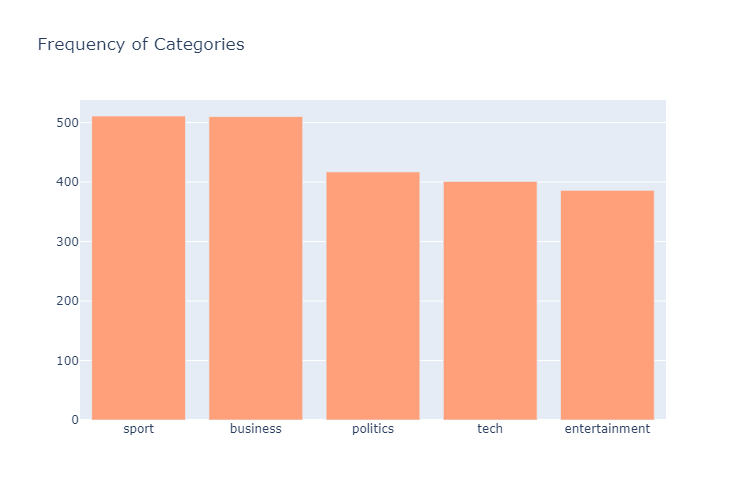

In [69]:
fig = go.Figure()
fig.add_trace(go.Bar(x = data.category.value_counts().index,
             y = data.category.value_counts(),
             marker_color='lightsalmon'))
fig.update_layout(width=800, height = 500, title = "Frequency of Categories")
fig.show()

In [70]:
print("Data cleaning in progress...")

# Tokenizes
data["text_clean"] = data["text"].apply(word_tokenize)
print("Tokenization complete.")

#remove stopwords
stop_words=set(stopwords.words("english"))
data["text_clean"] = data["text"].apply(lambda x: [item for item in x if item not in stop_words])
print("Stop words removed.")

#remove numbers, punctuation and special characters
data["text_clean"] = data["text_clean"].apply(lambda x: [item for item in x if re.match('[a-z]+', item)])
print("Numbers, punctiation and special characters removed.")

#lemmatization
lem = WordNetLemmatizer()
data["text_clean"] = data["text_clean"].apply(lambda x: [lem.lemmatize(item, pos="v") for item in x])
print('Lemmatization complete.\nData cleaning complete.\n')

Data cleaning in progress...
Tokenization complete.
Stop words removed.
Numbers, punctiation and special characters removed.
Lemmatization complete.
Data cleaning complete.



In [83]:
def Vectorize(vec, X_train, X_test):    
    
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)
    
    return X_train_vec, X_test_vec

In [84]:
enc = LabelEncoder()
data['category'] = enc.fit_transform(data['category'])
labels = list(enc.classes_)

# Train-test split and vectorize
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['category'], test_size=0.2, shuffle=True)
X_train_vec, X_test_vec = Vectorize(TfidfVectorizer(), X_train, X_test)

In [97]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
nb_pred = nb.predict(X_test_vec)
accuracy_score(y_test,nb_pred), precision_score(y_test,nb_pred,average="macro"),recall_score(y_test,nb_pred,average="macro"),f1_score(y_test,nb_pred,average="macro")

(0.9438202247191011,
 0.9429155796173176,
 0.9403540551417482,
 0.9385763183707312)

In [99]:
dectree = DecisionTreeClassifier(max_depth = 6, min_samples_split = 2)
dectree.fit(X_train_vec,y_train)
dec_pred = dectree.predict(X_test_vec)
accuracy_score(y_test,dec_pred), precision_score(y_test,dec_pred,average="macro"),recall_score(y_test,dec_pred,average="macro"),f1_score(y_test,dec_pred,average="macro")

(0.7235955056179775,
 0.7649806796048264,
 0.7059947337984036,
 0.7133412513120554)

In [100]:
svc = SVC(C=0.1)
svc.fit(X_train_vec, y_train)
svc_pred = nb.predict(X_test_vec)
accuracy_score(y_test,svc_pred), precision_score(y_test,svc_pred,average="macro"),recall_score(y_test,svc_pred,average="macro"),f1_score(y_test,svc_pred,average="macro")

(0.9438202247191011,
 0.9429155796173176,
 0.9403540551417482,
 0.9385763183707312)